<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Logistic_Regression_in_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression in TensorFlow 2.0 (MNIST Data set)

Author: https://theclickreader.com/courses/tensorflow-2-for-deep-learning/lessons/logistic-regression-with-tensorflow/

Modify by: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

## Read Data set

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Converting data to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

# Batching 
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(256).prefetch(1)

11493376/11490434 [==============================] - 0s 0us/step


## Create Model

In [8]:
from tensorflow.keras import Model

class MyModel:
    def __init__(self):
        super(MyModel,self).__init__()
        self.W = tf.Variable(tf.ones([28*28, 10]), name="weight")
        self.b = tf.Variable(tf.zeros([10]), name="bias")
    def __call__(self, x):
        return tf.nn.softmax(tf.matmul(x, self.W) + self.b)
    
   
def loss(y_pred, y_true):
    # Encode label to a one hot vector
    y_true = tf.one_hot(y_true, depth=10)
    
    # Clip prediction values to avoid log(0) error
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    
    # Compute cross-entropy
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Adma optimizer
optimizer = tf.optimizers.Adam(lr = 0.1)
    
def train(model, x, y):
    with tf.GradientTape() as t:
        pred = model(x)
        current_loss = loss(pred, y)
        print('Current Loss: ', current_loss.numpy())
    # Compute gradients
    gradients = t.gradient(current_loss, [model.W, model.b])
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [model.W, model.b]))

## Train Model

Current Loss:  2.302598
Current Loss:  1.411404
Current Loss:  1.2564114
Current Loss:  1.0575781
Current Loss:  0.7824031
Current Loss:  0.85841614
Current Loss:  0.6734951
Current Loss:  0.6773694
Current Loss:  0.7053803
Current Loss:  0.6717931
Current Loss:  0.628457
Current Loss:  0.6097736
Current Loss:  0.5912202
Current Loss:  0.5651703
Current Loss:  0.54080886
Current Loss:  0.5272182
Current Loss:  0.5287639
Current Loss:  0.5401118
Current Loss:  0.5345395
Current Loss:  0.50323
Current Loss:  0.47270587
Current Loss:  0.46013638
Current Loss:  0.45771456
Current Loss:  0.4523318
Current Loss:  0.4429029
Current Loss:  0.43846223
Current Loss:  0.43949476
Current Loss:  0.432181
Current Loss:  0.41408005
Current Loss:  0.40024132
Current Loss:  0.39666387
Current Loss:  0.39379486
Current Loss:  0.38505128
Current Loss:  0.37780124
Current Loss:  0.37694514
Current Loss:  0.37334055
Current Loss:  0.36324736
Current Loss:  0.355775
Current Loss:  0.35317844
Current Loss:  

Text(0, 0.5, 'Loss')

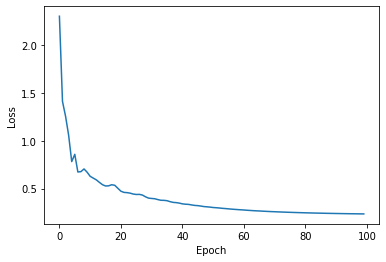

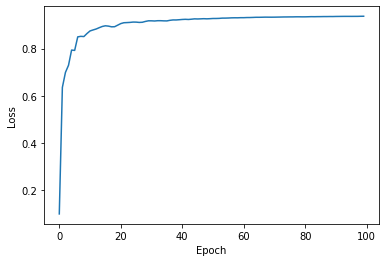

In [9]:
# Initialize the model
model = MyModel()
epochs = 100
losses = []
acces = []
for epoch_count in range(epochs):
    current_loss = loss(model(x_train), y_train)
    losses.append(current_loss)
    
    current_acc = accuracy(model(x_train), y_train)
    acces.append(current_acc)
    # Train the model
    train(model, x_train, y_train)
    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(losses) 
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.figure()
plt.plot(acces)    
plt.xlabel('Epoch')
plt.ylabel('Loss')   